# Integrals des courbes de remplissage colonne sans mousse et avec de l'eau pure

<span style="font-size: 3em;"> $\int_{0}^{\infty} C_{CO_2}dt$= $\int_{0}^{\infty} \frac{dn_{CO_2}}{dV}\frac{dV}{Q}$=$\frac{1}{Q}\int_{0}^{\infty}dn_{CO_2}$ </span>

<span style="font-size: 3em;"> $n_{CO_2}= Q\int_{0}^{\infty} C_{CO_2}dt$  </span>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
file_path_eau='/home/ruben/M2-THESE-RUBEN-LIPHY/Test_eau_pure/test_colonne_3D_eau_pure_remplissage_8_co2.csv'
file_path_sans_mousse='/home/ruben/M2-THESE-RUBEN-LIPHY/test_colonne_sans_mousse_remplissage_8_co2.csv'

Débit constant en ml/s:

In [16]:
Q=80/60

Data colonne sans mousse et sans liquide:

In [17]:
db_sans_mousse=pd.read_csv(file_path_sans_mousse)
x1=db_sans_mousse.index*Q/2 
y1=(db_sans_mousse['Media value concentration']/100)*100/(db_sans_mousse['Media value concentration'].max()/100)

Data colonne avec de l'eau pure:

In [18]:
db_eau=pd.read_csv(file_path_eau)
x2=db_eau.index*Q/2
y2=(db_eau['Media value concentration']/100)*100/(db_eau['Media value concentration'].max()/100)

Pour faite l'integration, on definit les limites de l'integral en x, on prend comme reference la courbe sans mousse et sans liquide:

In [19]:
x_target=x1.max()

On calcule les nouveaux limites dans la courbe avec de l'eau pure jusqu'au ce target:

In [20]:
x2_new=x2[x2<x_target]
y2_new=y2[:len(x2_new)]

On calcule les integrals:

In [21]:
integral=np.trapz(y1,x=x1)
integral_2=np.trapz(y2_new, x=x2_new)

In [22]:
print('Integral au dessous de la courbe de remplissage sans mousse est: ', integral)

Integral au dessous de la courbe de remplissage sans mousse est:  1223161.8571476182


In [23]:
print('Integral au dessous de la courbe de remplissage liquide sans surfactant est: ', integral_2)

Integral au dessous de la courbe de remplissage liquide sans surfactant est:  1141745.2859591707


In [24]:
integral_diff=integral-integral_2

In [25]:
print('The difference of the integrals are: ', integral_diff)

The difference of the integrals are:  81416.57118844753


On fait le plot des differences des integrals

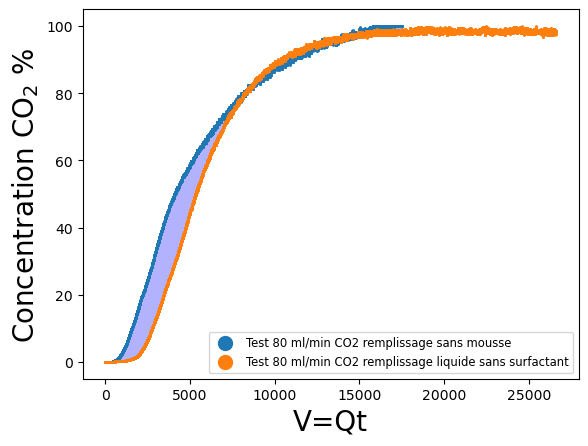

In [27]:
plt.fill_between(x2_new, y2_new, y1[:len(x2_new)], where=(y1[:len(x2_new)] >=y2_new), color='blue', alpha=0.3)
plt.fill_between(x2_new, y2_new, y1[:len(x2_new)], where=(y1[:len(x2_new)] < y2_new), color='blue', alpha=0.3)
plt.scatter(x1, y1, label='Test 80 ml/min CO2 remplissage sans mousse', marker='o', s=1)
plt.scatter(x2, y2, label='Test 80 ml/min CO2 remplissage liquide sans surfactant', marker='o', s=1)
plt.xlabel('V=Qt', fontsize=20)
plt.ylabel('Concentration CO$_2$ %', fontsize=20)
plt.legend(loc='lower right', fontsize='small',markerscale=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Integrals des courbes de vidange colonne sans mousse et avec de l'eau pure

In [29]:
file_path_eau='/home/ruben/M2-THESE-RUBEN-LIPHY/Test_eau_pure/test_colonne_3D_eau_pure_vidange_8_co2.csv'
file_path_sans_mousse='/home/ruben/M2-THESE-RUBEN-LIPHY/test_colonne_sans_mousse_vidange_8_co2.csv'

In [30]:
Q=80/60 
db_eau=pd.read_csv(file_path_eau)
db_sans_mousse=pd.read_csv(file_path_sans_mousse)

In [32]:
x1=db_eau.index*Q/2
y1=(db_eau['Media value concentration']/100)*100/(db_eau['Media value concentration'].max()/100)
x_target=x1.max()

In [33]:
x2=db_sans_mousse.index*Q/2 
y2=(db_sans_mousse['Media value concentration']/100)*100/(db_sans_mousse['Media value concentration'].max()/100)

In [34]:
x2_new=x2[x2<x_target]
y2_new=y2[:len(x2_new)]

In [35]:
integral=np.trapz(y1,x=x1)
integral_2=np.trapz(y2_new, x=x2_new)
print('Integral au dessous de la courbe de remplissage liquid sans surfactant est: ', integral)
print('Integral au dessous de la courbe de remplissage sans mousse est: ', integral_2)

Integral au dessous de la courbe de remplissage liquid sans surfactant est:  634796.3211358201
Integral au dessous de la courbe de remplissage sans mousse est:  626980.3652968038


In [36]:
integral_diff=integral-integral_2
print('The difference of the integrals are: ', integral_diff)

The difference of the integrals are:  7815.955839016358


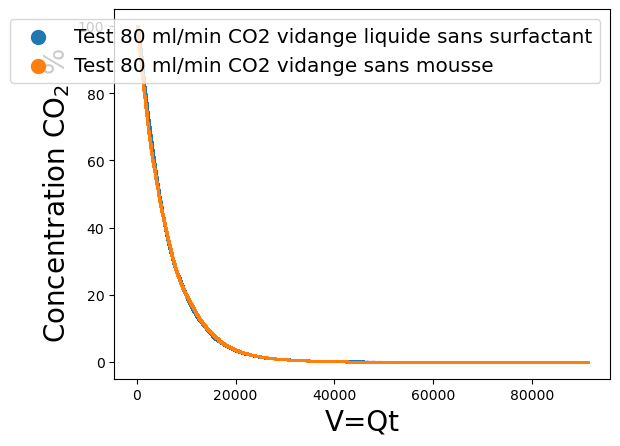

In [44]:
plt.fill_between(x2_new, y2_new, y1[:len(x2_new)], where=(y1[:len(x2_new)] >=y2_new), color='blue', alpha=0.3)
plt.fill_between(x2_new, y2_new, y1[:len(x2_new)], where=(y1[:len(x2_new)] < y2_new), color='blue', alpha=0.3)
plt.scatter(x1, y1, label='Test 80 ml/min CO2 vidange liquide sans surfactant', marker='o', s=1)
plt.scatter(x2, y2, label='Test 80 ml/min CO2 vidange sans mousse', marker='o', s=1)
plt.xlabel('V=Qt', fontsize=20)
plt.ylabel('Concentration CO$_2$ %', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize='x-large',markerscale=10)
plt.show()

In [52]:
print((db_eau.index/2).max())

62518.5
